In [1]:
!pip install -U pymc3

Requirement already up-to-date: pymc3 in /home/upul/anaconda3/lib/python3.6/site-packages
Requirement already up-to-date: h5py>=2.7.0 in /home/upul/anaconda3/lib/python3.6/site-packages (from pymc3)
Requirement already up-to-date: pandas>=0.18.0 in /home/upul/anaconda3/lib/python3.6/site-packages (from pymc3)
Requirement already up-to-date: arviz>=0.4.1 in /home/upul/anaconda3/lib/python3.6/site-packages (from pymc3)
Requirement already up-to-date: tqdm>=4.8.4 in /home/upul/anaconda3/lib/python3.6/site-packages (from pymc3)
Requirement already up-to-date: scipy>=0.18.1 in /home/upul/anaconda3/lib/python3.6/site-packages (from pymc3)
Requirement already up-to-date: patsy>=0.4.0 in /home/upul/anaconda3/lib/python3.6/site-packages (from pymc3)
Requirement already up-to-date: theano>=1.0.4 in /home/upul/anaconda3/lib/python3.6/site-packages (from pymc3)
Requirement already up-to-date: numpy>=1.13.0 in /home/upul/anaconda3/lib/python3.6/site-packages (from pymc3)
Requirement already up-to-d

In [2]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import stats

%matplotlib inline

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
/home/upul/anaconda3/lib/python3.6/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


##### Question 1

The weights listed below were recorded in the !Kung census, but heights
were not recorded for these individuals. Provide predicted heights and 89%
compatibility intervals for each of these individuals. That is, fill in the table
below, using model-based predictions.

|Individual |weight |expected height |89% interval|
|-----------|-------|----------------|------------|
|1          |45     |   -            |     -      |
|2          |40     |-               |-           |
|3          |65     |-               |-           |
|4          |31     |-               |-           |
|5          |53     |-               |-           |

In [3]:
q1_data = pd.read_csv('../../data/Howell1.csv', sep=';')
print(f'dataset size: {len(q1_data)}')
q1_data.head(5)

dataset size: 544


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


In [4]:
q1_pred_data = pd.DataFrame(np.array([45, 40, 65, 31, 53])).reset_index().rename(columns={'index':'Individual',0:'weight'})
q1_pred_data['expected height']=np.nan
q1_pred_data['89% interval'] = np.nan
q1_pred_data

,Individual,weight,expected height,89% interval
0,0,45,NaN,NaN
1,1,40,NaN,NaN
2,2,65,NaN,NaN
3,3,31,NaN,NaN
4,4,53,NaN,NaN


In [5]:
# height ~ Normal(mu, sigma)
# mu ~ alpha + beta * weight
# alpha ~ Normal(178, 20)
# beta ~ Normal(0, 10)
# sigma ~ Uniform(0, 50)
q1_data = q1_data[q1_data.age >= 18]
q1_data_weight_mean = q1_data.weight.mean()
q1_data.weight = q1_data.weight - q1_data_weight_mean

with pm.Model() as q1_model:
    # data
    weight = pm.Data('weight', q1_data.weight)
    height = pm.Data('height', q1_data.height)
    
    alpha = pm.Normal('alpha', mu=80, sd=20)
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma_height = pm.Uniform('sigma_height', lower=0, upper=50)
    mu_height = pm.Deterministic('mu_height', alpha + beta*weight)
    
    posterior_height = pm.Normal('posterior_height', mu=mu_height, sd=sigma_height,
                                observed=height)
    q1_samples = pm.sample(2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_height, beta, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 12000/12000 [00:03<00:00, 3701.58draws/s]


In [6]:
pm.summary(q1_samples, varnames=['alpha', 'beta', 'sigma_height'])

/home/upul/anaconda3/lib/python3.6/site-packages/pymc3/stats/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.9
  "pymc3 3.9".format(old=old, new=new)


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,154.579,0.274,154.048,155.067,0.003,0.002,10686.0,10686.0,10654.0,5682.0,1.0
beta,0.906,0.043,0.829,0.988,0.000,0.000,10604.0,10536.0,10587.0,6142.0,1.0
sigma_height,5.106,0.195,4.760,5.482,0.002,0.001,9697.0,9671.0,9644.0,5744.0,1.0


/home/upul/anaconda3/lib/python3.6/site-packages/pymc3/plots/__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))
/home/upul/anaconda3/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/upul/anaconda3/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/upul/anaconda3/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot

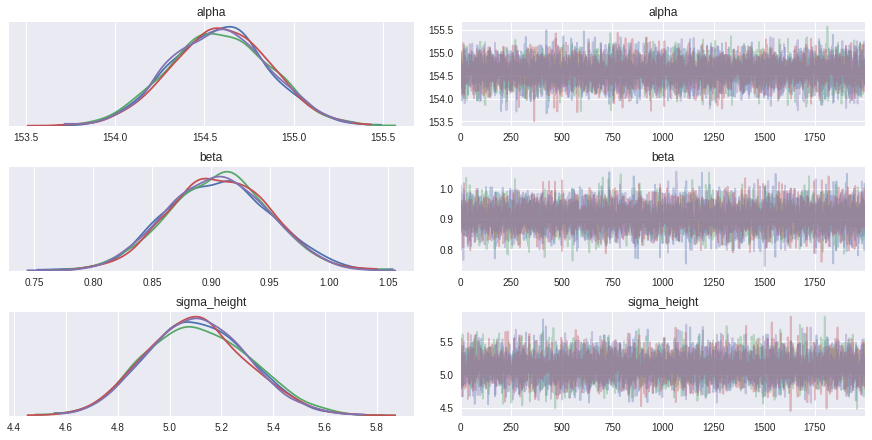

In [7]:
pm.traceplot(q1_samples, varnames=['alpha', 'beta', 'sigma_height'])
plt.show()

In [8]:
# aux = pd.DataFrame(np.array([45, 40, 65, 31, 53])).reset_index().rename(columns={'index':'Individual',0:'weight'})
# aux['expected height']=np.nan
# aux['89% interval'] = np.nan
# aux

weight.set_value(np.array([45, 40, 65, 31, 53]) - q1_data_weight_mean)
q1_predictive = pm.sample_posterior_predictive(trace=q1_samples, model=q1_model, samples=500)

/home/upul/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 500/500 [00:05<00:00, 89.78it/s] 


In [11]:
q1_pred_data['expected height'] = q1_predictive['posterior_height'].mean(axis=0)
q1_pred_data['89% interval'] = pd.Series(list(pm.hpd(q1_predictive['posterior_height'], credible_interval=0.89)))
q1_pred_data

,Individual,weight,expected height,89% interval
0,0,45,154.808177,"[146.96854843811025, 163.05764833430473]"
1,1,40,150.106725,"[142.53349255191736, 158.40661402392553]"
2,2,65,172.716094,"[165.2435927482672, 181.699301159018]"
3,3,31,142.020182,"[133.5190233517095, 149.85887339160158]"
4,4,53,161.884675,"[153.567890657467, 169.9426994771205]"
